# Exploratody Data Analysis

## 1.Import Library

In [1]:
# Core library
import pandas as pd
import numpy as np
import datetime
import warnings
import os

# Visualization library
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


---

## Loading dataset with Pandas

We will start by loading `client_data.csv` and `price_data.csv` into each dataframe to work with python.

In [2]:
# Find file path
path = os.getcwd()

# Load dataset
client_df = pd.read_csv(os.path.join(path,'client_data.csv')) 
price_df = pd.read_csv(os.path.join(path,'price_data.csv')) 

We start by looking at the first 5 rows of dataframe using `head(5)`.

In [3]:
client_df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
price_df.head(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


---

## 2.Descriptive statistic of data

### Data types

We will use `shape` to look at the number of column and row of dataframe. We will also using `info()` to get structure of dataframe.

In [5]:
print(client_df.shape)
client_df.info()

(14606, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_

In [6]:
print(price_df.shape)
price_df.info()

(193002, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

We will start looking at statistic of the dataframes using `describe()`. To make it easier to read we will only look at 2 decimal using `round(2)`.

In [7]:
client_df.describe().round(2)

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.00,14606.0
mean,159220.29,28092.38,16090.27,1868.61,1399.76,0.97,63.09,0.14,0.05,43.13,152.79,24.57,24.56,1.29,189.26,5.00,18.14,0.1
std,573465.26,162973.06,64364.20,2387.57,3247.79,5.11,66.17,0.02,0.05,4.49,341.37,20.23,20.23,0.71,311.80,1.61,13.53,0.3
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,3.30,0.0
25%,5674.75,0.00,0.00,495.00,0.00,0.00,16.18,0.12,0.00,40.61,0.00,14.28,14.28,1.00,50.71,4.00,12.50,0.0
50%,14115.50,0.00,792.50,1112.88,314.00,0.00,18.80,0.14,0.08,44.31,37.39,21.64,21.64,1.00,112.53,5.00,13.86,0.0
75%,40763.75,0.00,3383.00,2401.79,1745.75,0.00,131.03,0.15,0.10,44.31,193.98,29.88,29.88,1.00,243.10,6.00,19.17,0.0
max,6207104.00,4154590.00,771203.00,82902.83,175375.00,30.00,599.31,0.27,0.20,59.27,15042.79,374.64,374.64,32.00,24570.65,13.00,320.00,1.0


In [8]:
price_df.describe().round(2)

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.00,193002.00,193002.00,193002.00,193002.00,193002.00
mean,0.14,0.05,0.03,43.33,10.62,6.41
std,0.03,0.05,0.04,5.41,12.84,7.77
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.13,0.00,0.00,40.73,0.00,0.00
50%,0.15,0.09,0.00,44.27,0.00,0.00
75%,0.15,0.10,0.07,44.44,24.34,16.23
max,0.28,0.23,0.11,59.44,36.49,17.46


### Finding NA/NULL data

To make sure the data is clean. We will look for any NULL/NA data in the dataframe using `isna()`. We will get total of missing data using `sum()`.

In [9]:
client_df.isna().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [10]:
price_df.isna().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

It's appear the data is clean. Note: there are some data label as `MISSING`. Will need to describe what to do with the team.

---

## 3.Data visualization

First we want use a bar chart to better visualize the data. In this case the stacked bar chart is the best if we are going to look into over all churn status. As we will use them multiple time create a function will save time.

In [11]:
# Set plot style
sns.set(color_codes=True)

In [12]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

### Start by looking at churning status

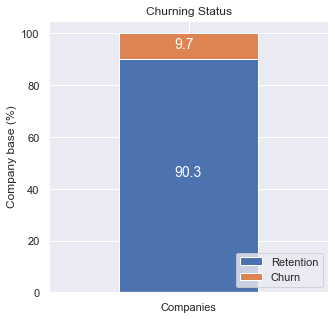

In [13]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning Status", (5, 5), legend_="lower right")

About 10% of total customer have churned.

### Sales Channel

In [14]:
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

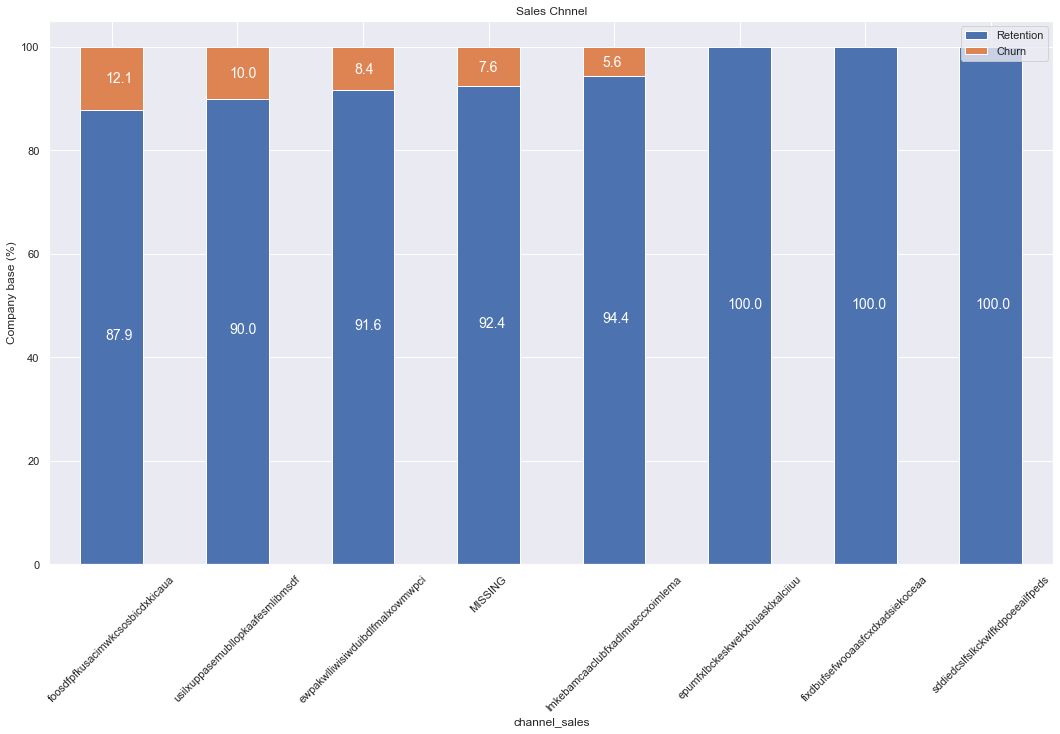

In [15]:
plot_stacked_bars(channel_churn, "Sales Chnnel", rot_= 45)

It's appear that the churning customers are distributed over 5 different value for `channel_sales`. There appear to be value of *MISSING* with a churn percent of 7.6%. We will need to talk with the team what to do as it's could be important feature in our model.

###  Consumption

In [16]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

We will see the distribution of power over the last year and month.

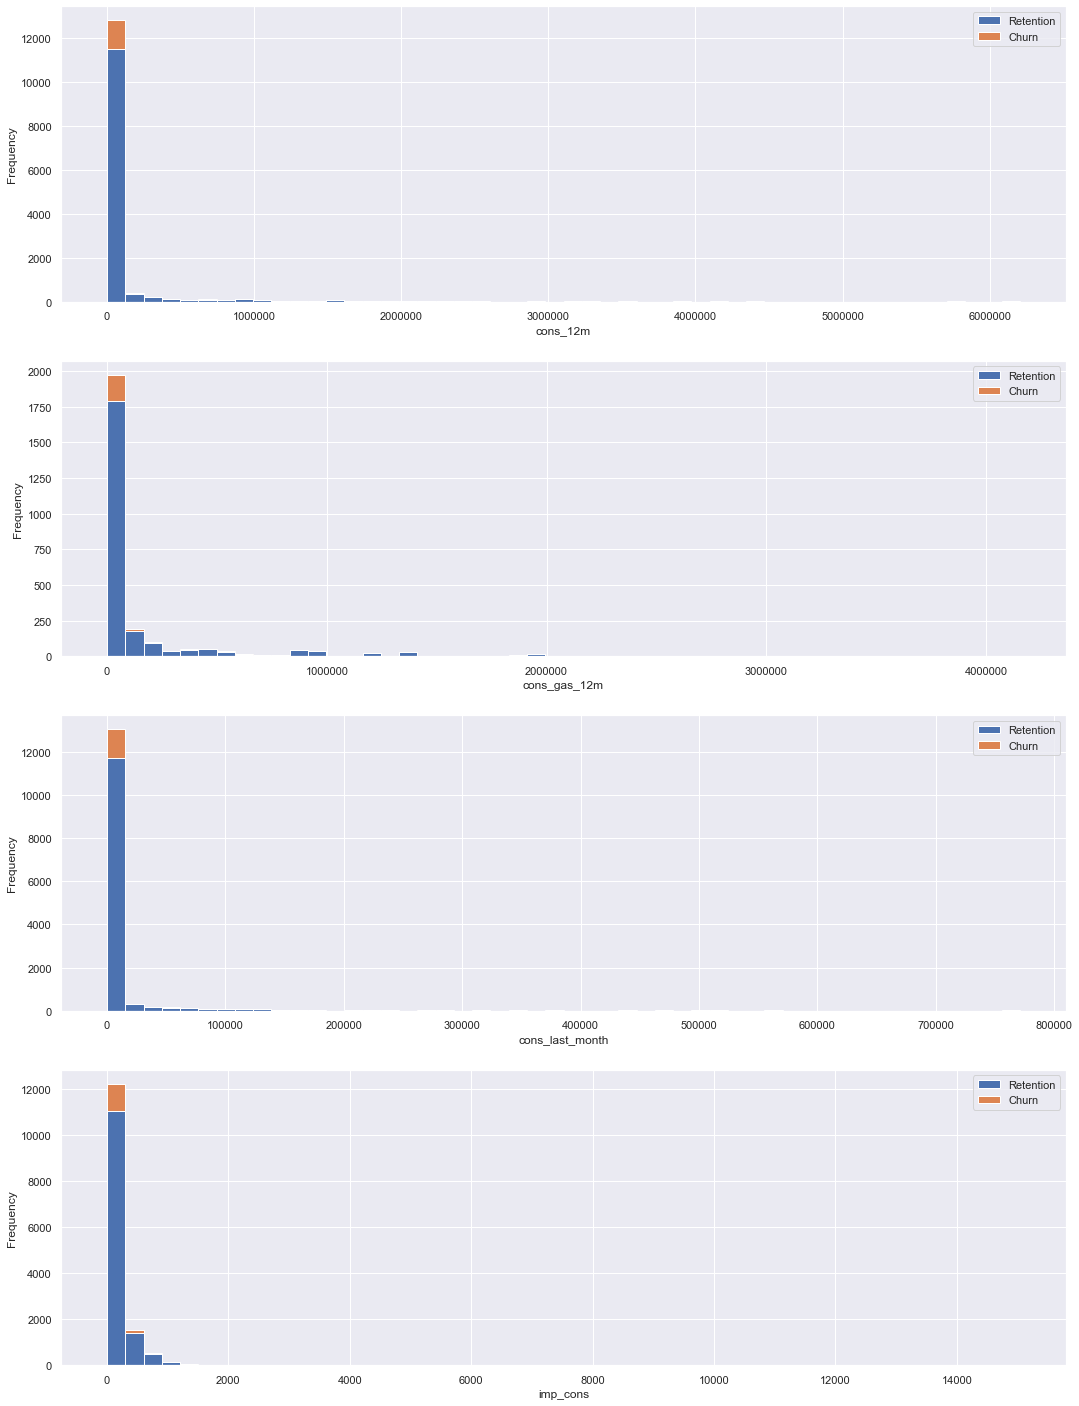

In [17]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

# Last 12 months overall consumption
plot_distribution(consumption, 'cons_12m', axs[0])
# Last 12 months gas consumption
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
# Last months overall consumption
plot_distribution(consumption, 'cons_last_month', axs[2])
# Overall paid consumption
plot_distribution(consumption, 'imp_cons', axs[3])

The consumption is positively skewed. As presented by a very long right-tail.
The values on the higher and lower end of the distribution are likely to be outliers. We can use a standard plot to visualise the outliers in more detail using boxplot to find five summary :
 - -- Minimum -- First quartile (Q1) -- Median -- Third quartile (Q3) -- Maximum

C:\Users\Administrator\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Administrator\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Administrator\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an ex

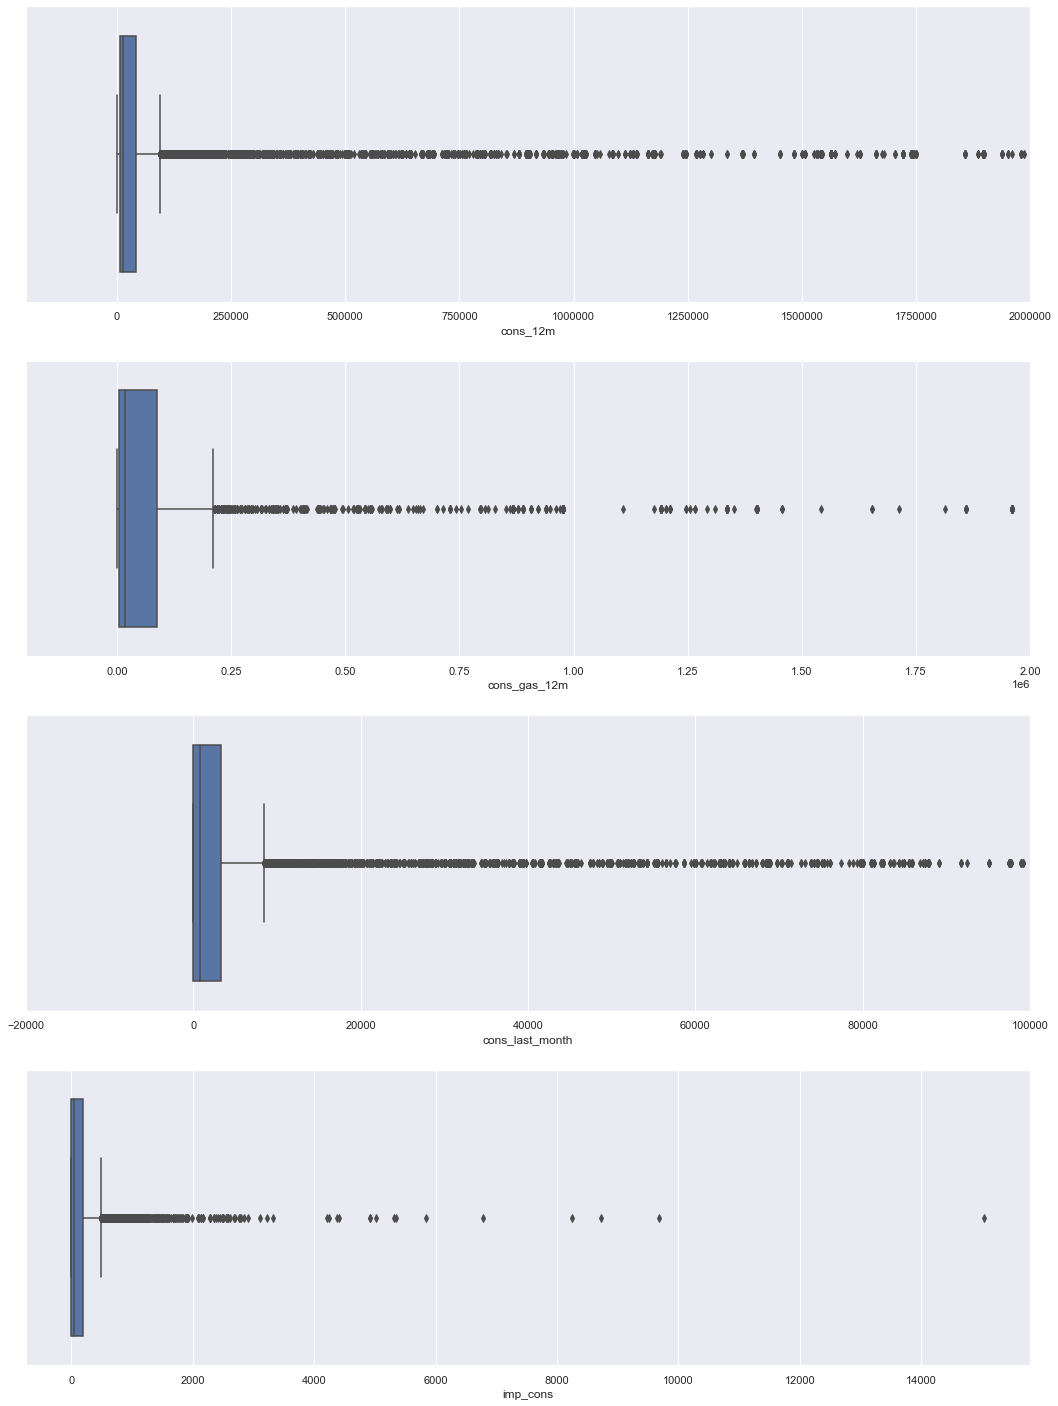

In [18]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

# Histogram
sns.boxplot(consumption['cons_12m'], ax=axs[0])
sns.boxplot(consumption[consumption['has_gas'] == 't']['cons_gas_12m'], ax=axs[1])
sns.boxplot(consumption['cons_last_month'], ax=axs[2])
sns.boxplot(consumption['imp_cons'], ax=axs[3])

# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
    # Set x-axis limit
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)
    plt.show()


To deal with skew we can use 1.5IQR.

### Dates

In [19]:
dates = client_df[['id', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'churn']].copy()

As the date is not in datetime format yet we havt to tranform data type.

In [21]:
# Transform datatype to datetime
dates['date_activ'] = pd.to_datetime(dates['date_activ'], format = '%Y-%m-%d')
dates['date_end'] = pd.to_datetime(dates['date_end'], format = '%Y-%m-%d')
dates['date_modif_prod'] = pd.to_datetime(dates['date_modif_prod'], format = '%Y-%m-%d')
dates['date_renewal'] = pd.to_datetime(dates['date_renewal'], format = '%Y-%m-%d')

In [30]:
def plot_dates(dataframe, column, fontsize_=12):
    """
    Plot monthly churn and retention distribution
    """
    # Group by month
    temp = dataframe[[column, 'churn', 'id']].set_index(column).groupby([pd.Grouper(freq='M'), 'churn']).count().unstack(level=1)
    # Plot the bar
    ax=temp.plot(kind='bar', stacked=True, figsize=(18, 10), rot=0)
    # X-axis label
    ax.set_xticklabels(map(lambda x: line_format(x), temp.index))
    # Change the x-label font
    plt.xticks(fontsize=fontsize_)
    # Name y-label
    plt.ylabel("Number of Companies")
    # Legend
    plt.legend(['Retentiobn', 'Churn'], loc="upper right")
    plt.show()

def line_format(label):
    """
    Convert time label to format of pandas line plot
    """
    month = label.month_name()[:1]
    if label.month_name() == "January":
        month += f'\n{label.year}'
    return month


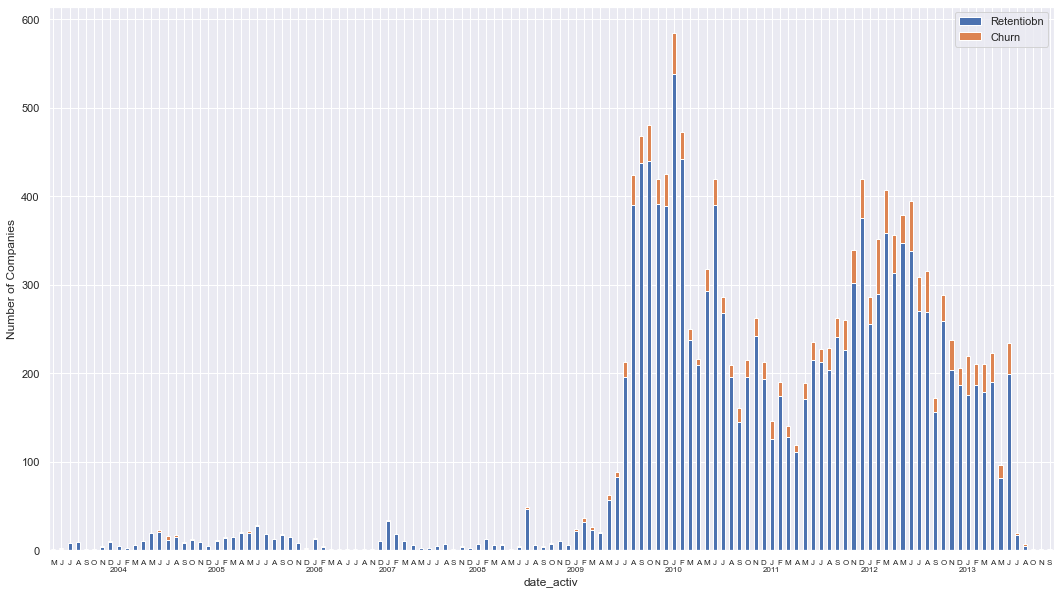

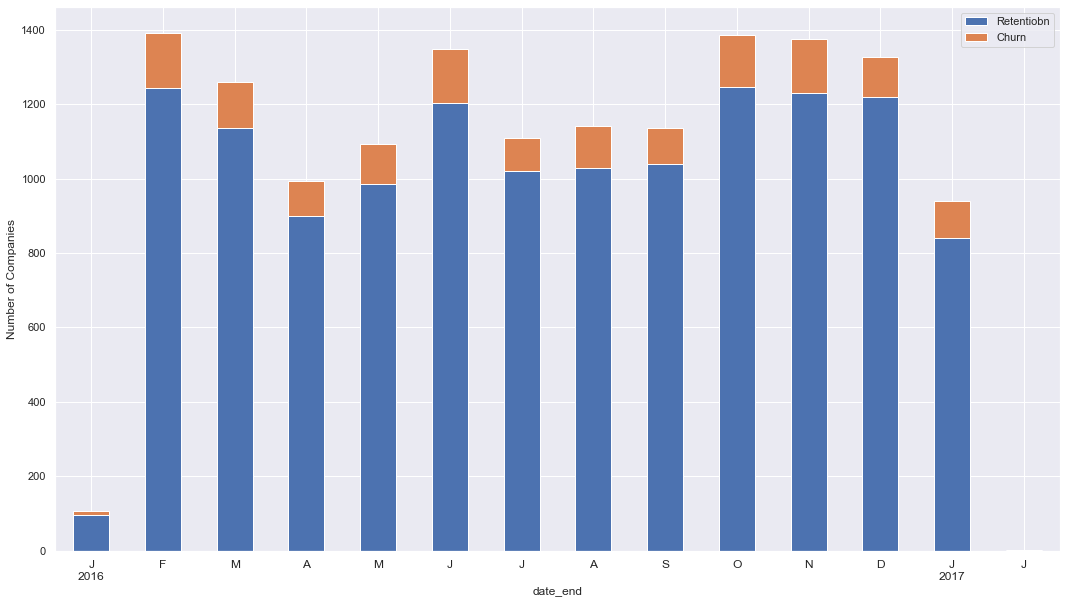

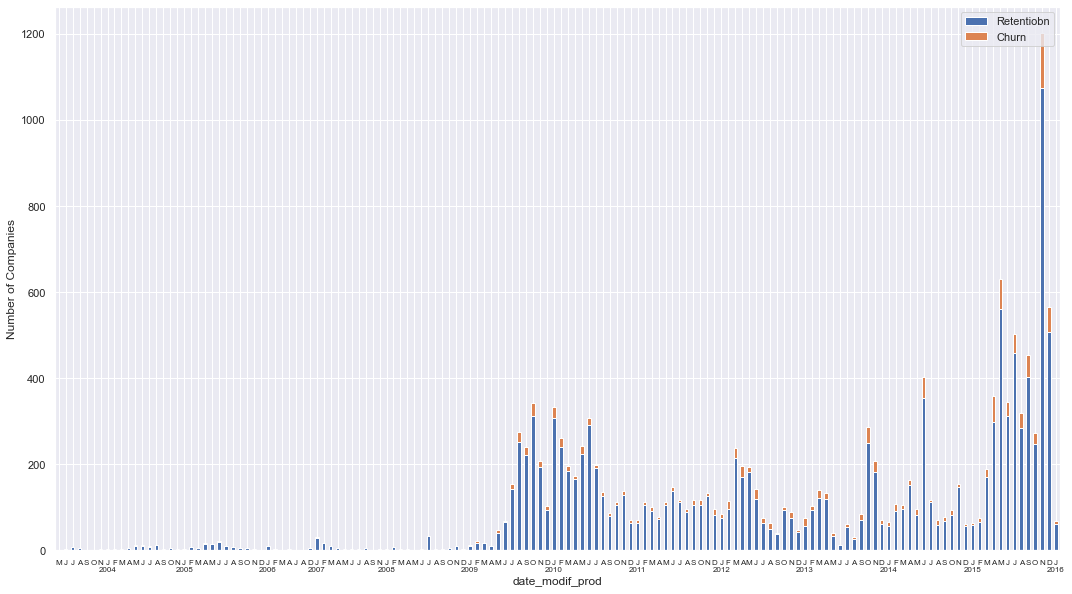

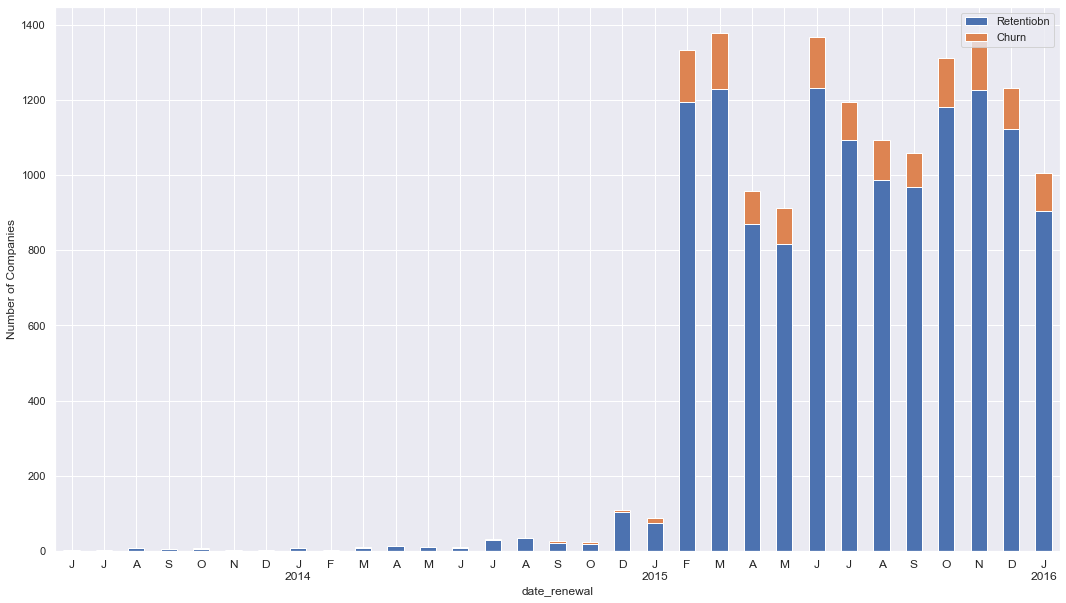

In [34]:
plot_dates(dates, 'date_activ', 8)
plot_dates(dates, 'date_end')
plot_dates(dates, 'date_modif_prod', 8)
plot_dates(dates, 'date_renewal')

Visulizing churn of companies with date did not yield any useful insight. So consider create new feature.

### Forecast

In [35]:
forecase = client_df[['id', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
                    'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'churn']]

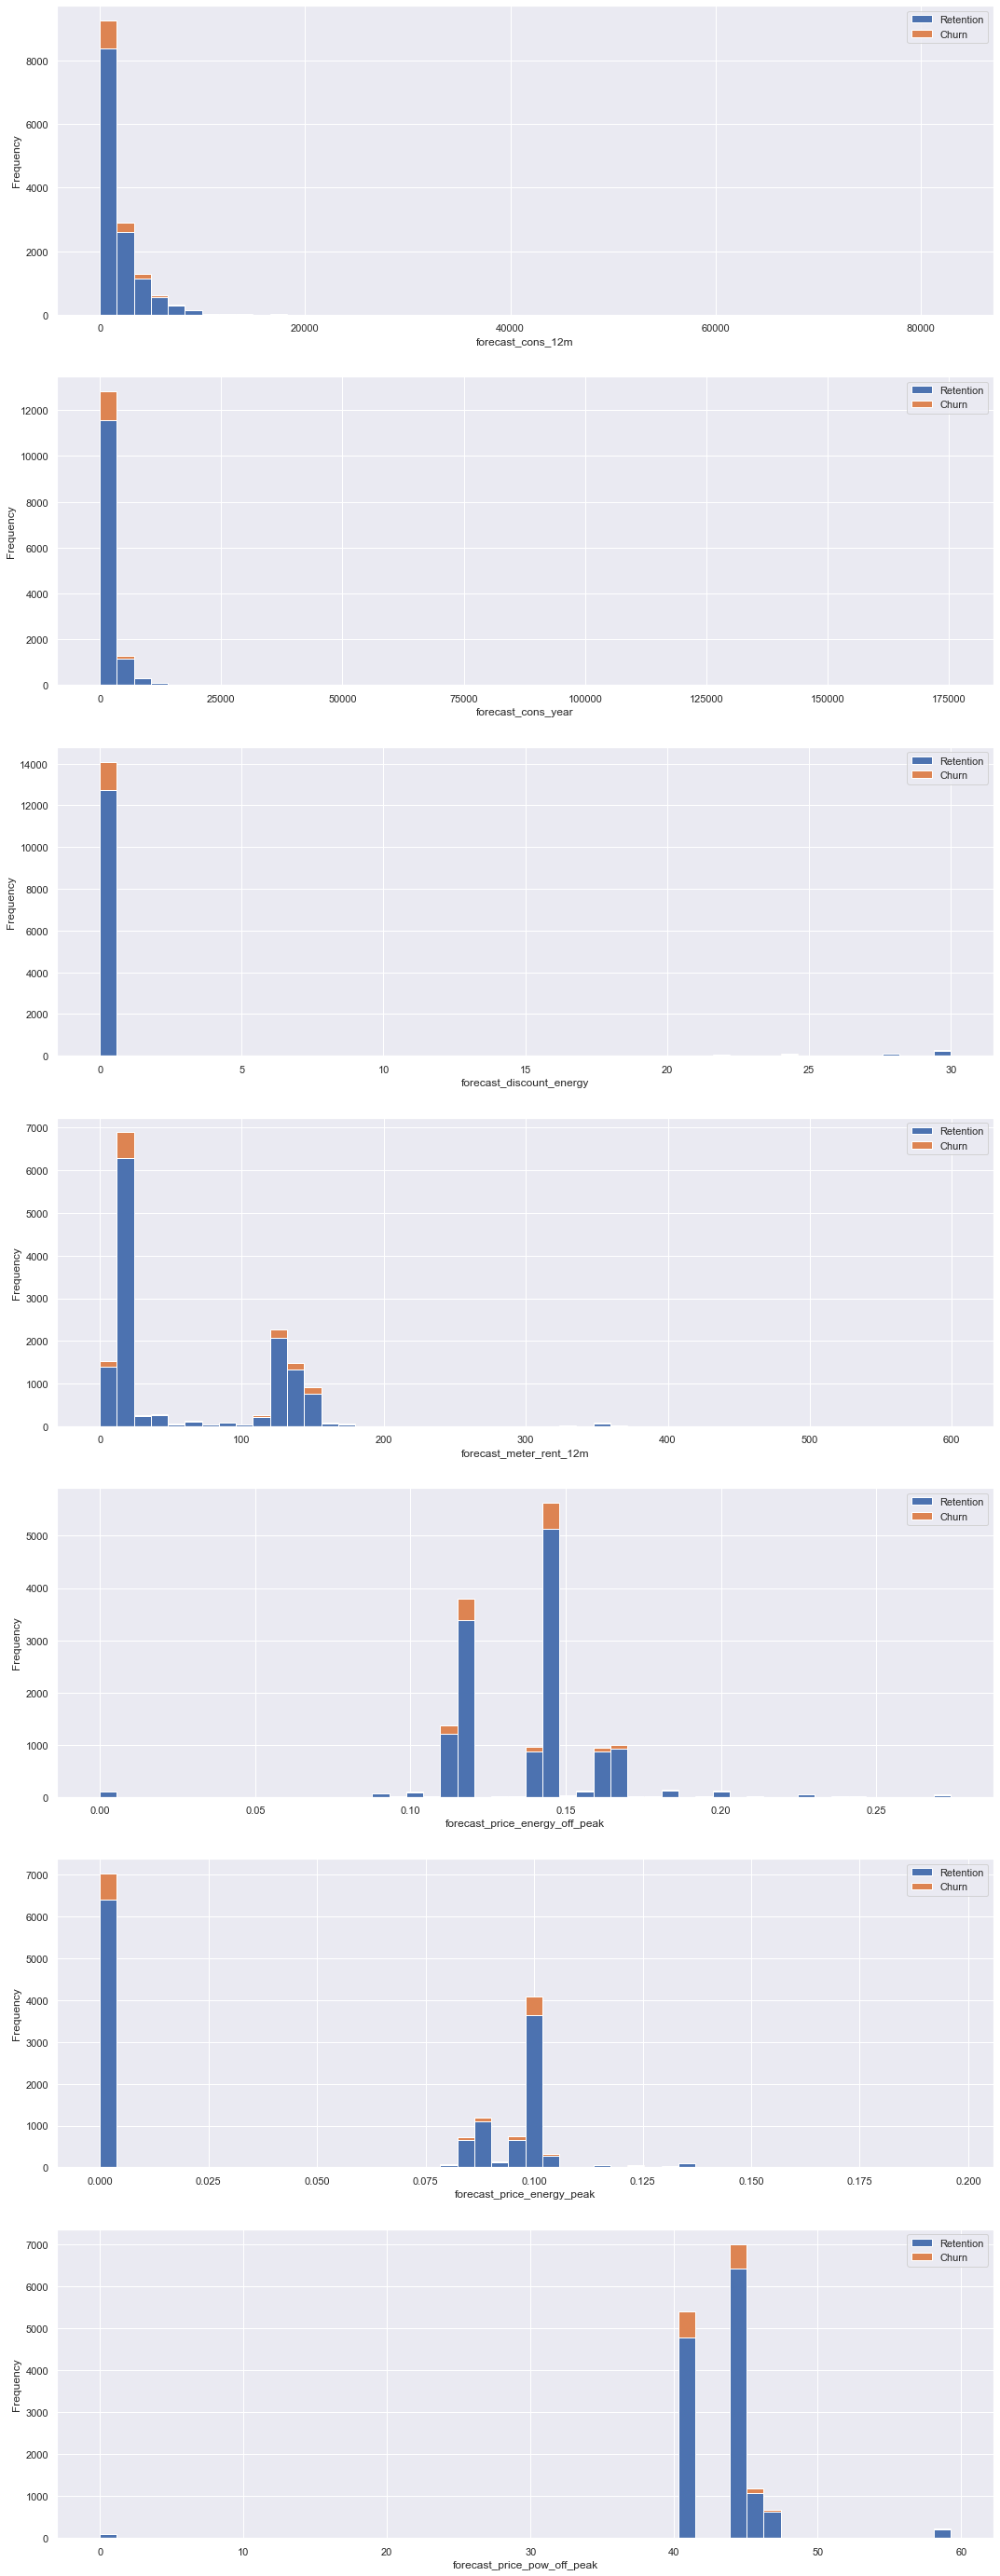

In [38]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_df, 'forecast_cons_12m', axs[0])
plot_distribution(client_df, 'forecast_cons_year', axs[1])
plot_distribution(client_df, 'forecast_discount_energy', axs[2])
plot_distribution(client_df, 'forecast_meter_rent_12m', axs[3])
plot_distribution(client_df, 'forecast_price_energy_off_peak', axs[4])
plot_distribution(client_df, 'forecast_price_energy_peak', axs[5])
plot_distribution(client_df, 'forecast_price_pow_off_peak', axs[6])

A lot of variables are positively skewed similar to consumption plots. We will need to transform them later.

### Contract type

To seperate companies into 2 group based on using gas or not

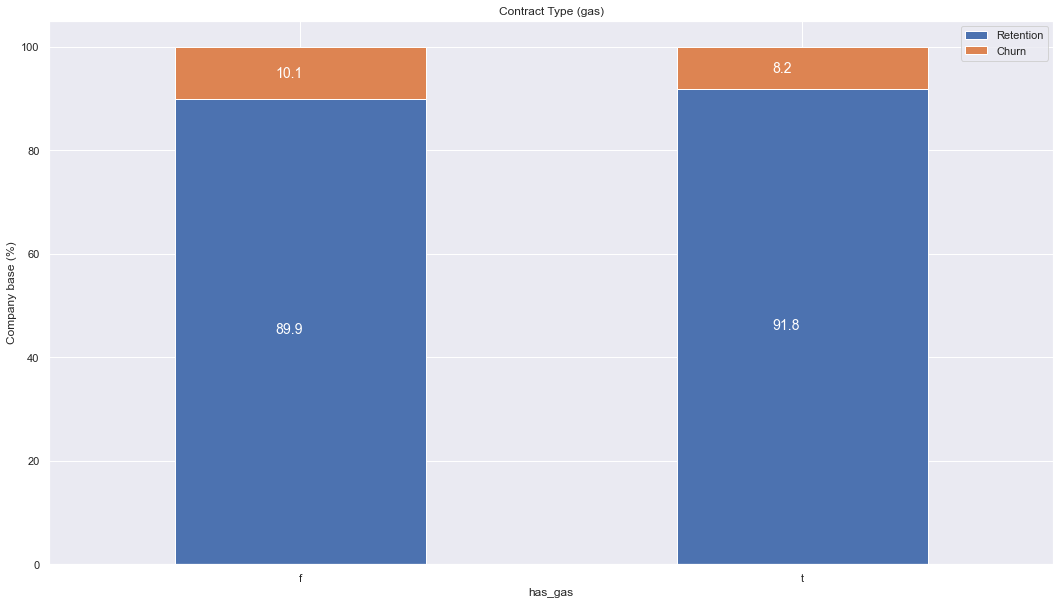

In [42]:
contract_type = client_df[['id', 'has_gas', 'churn']]
# Group into by using gas and churn
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

# Plot stacked bar
plot_stacked_bars(contract_percentage, "Contract Type (gas)")

### Margins

In [43]:
margins = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

C:\Users\Administrator\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Administrator\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Administrator\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an ex

<AxesSubplot:xlabel='net_margin'>

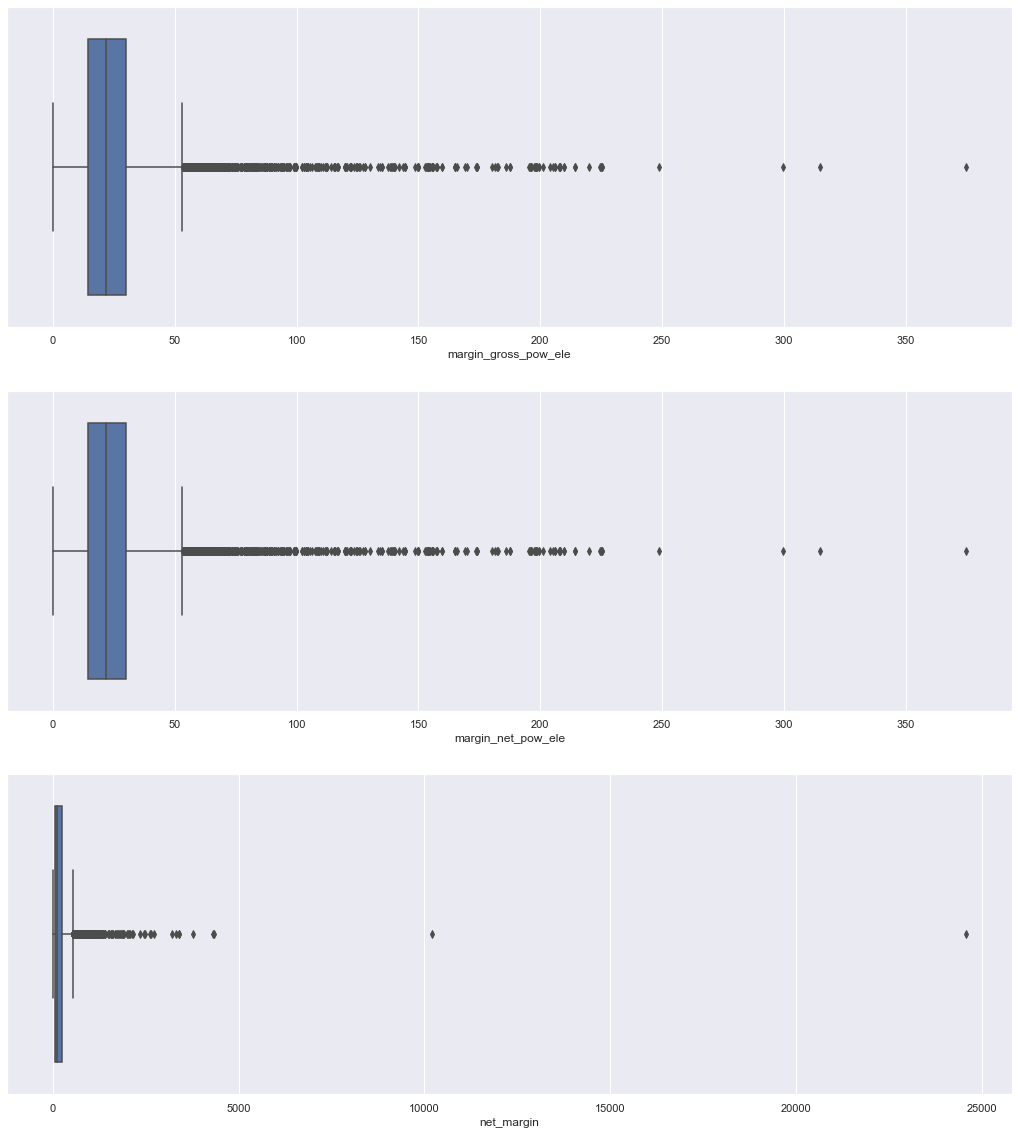

In [45]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))

#Plot
sns.boxplot(margins['margin_gross_pow_ele'], ax=axs[0])
sns.boxplot(margins['margin_net_pow_ele'], ax=axs[1])
sns.boxplot(margins['net_margin'], ax=axs[2])

We will deal with outliers using 1.5IQR

### Subscribed power

In [46]:
power = client_df[['id', 'pow_max', 'churn']]

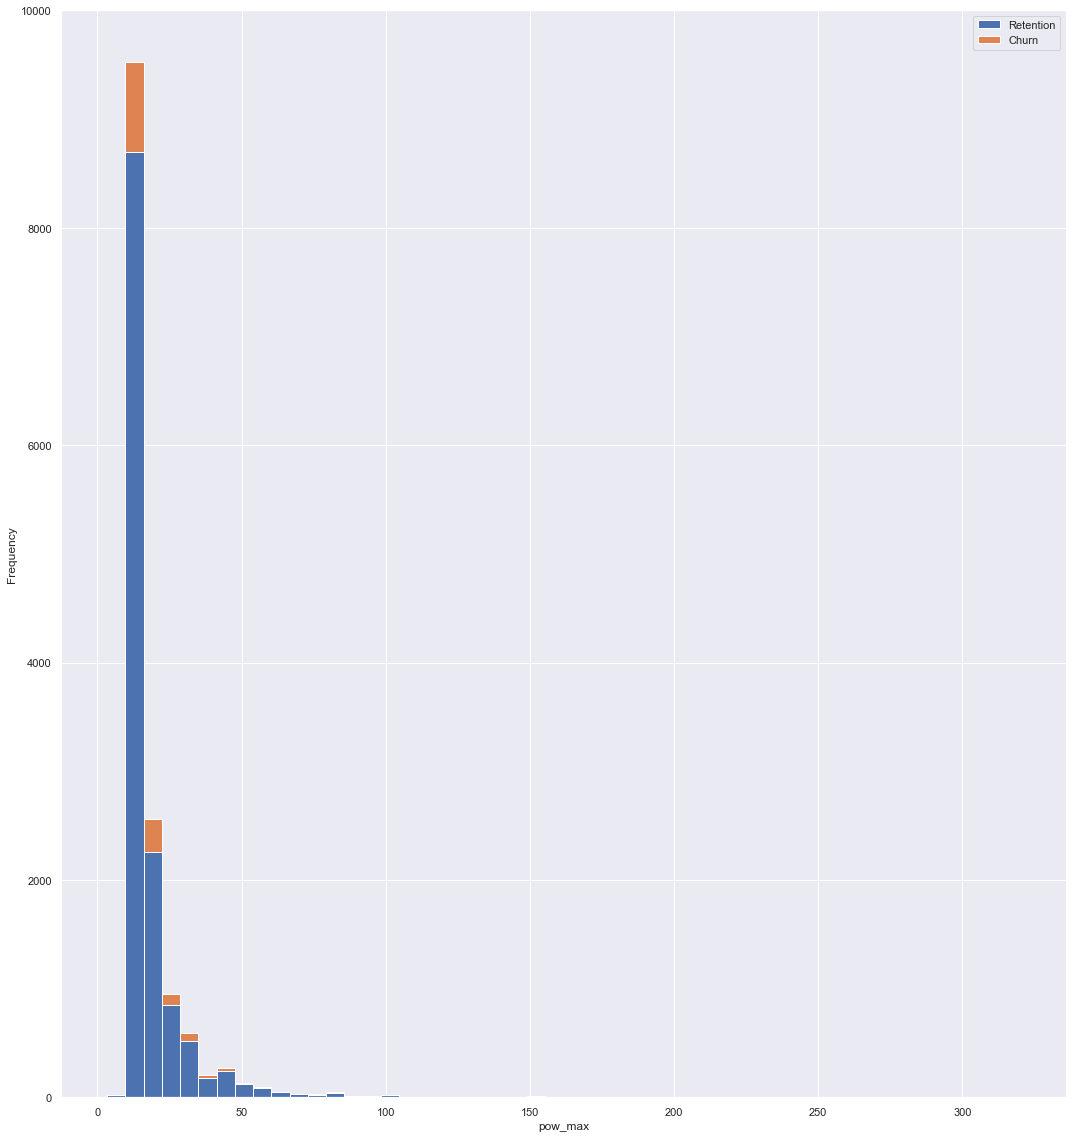

In [48]:
fix, axs = plt.subplots(figsize = (18,20))
# Plot
plot_distribution(power, 'pow_max', axs)

### Others

In [57]:
others = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
# Group products
products = others.groupby([others['nb_prod_act'], others['churn']])['id'].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

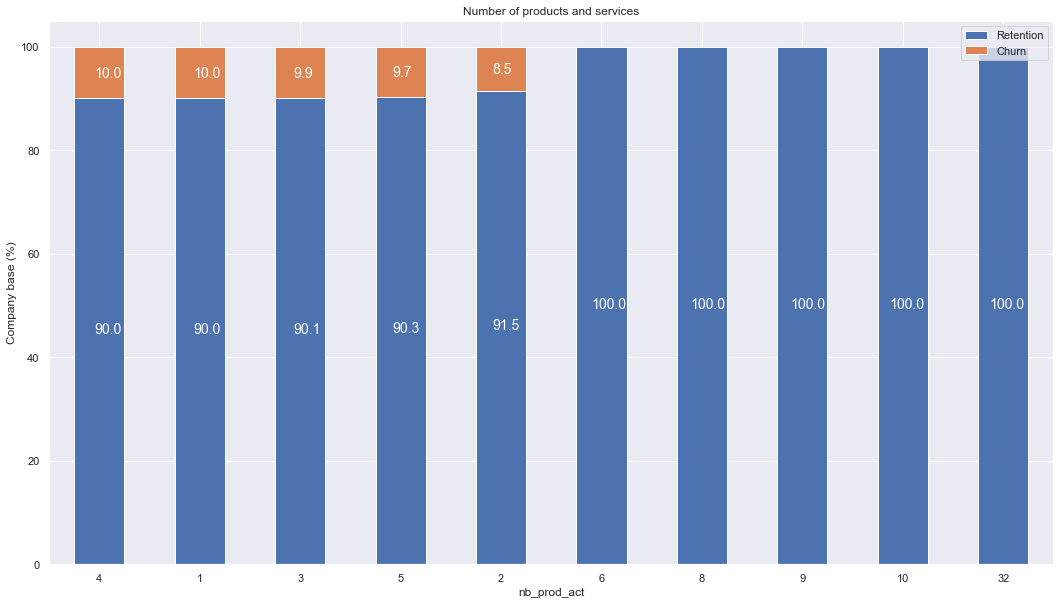

In [56]:
plot_stacked_bars(products_percentage, "Number of products and services")

In [69]:
# Group antiquity 
antiquity = others.groupby([others['num_years_antig'], others['churn']])['id'].count().unstack(level=1)
antiquity_percentage = (antiquity.div(antiquity.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

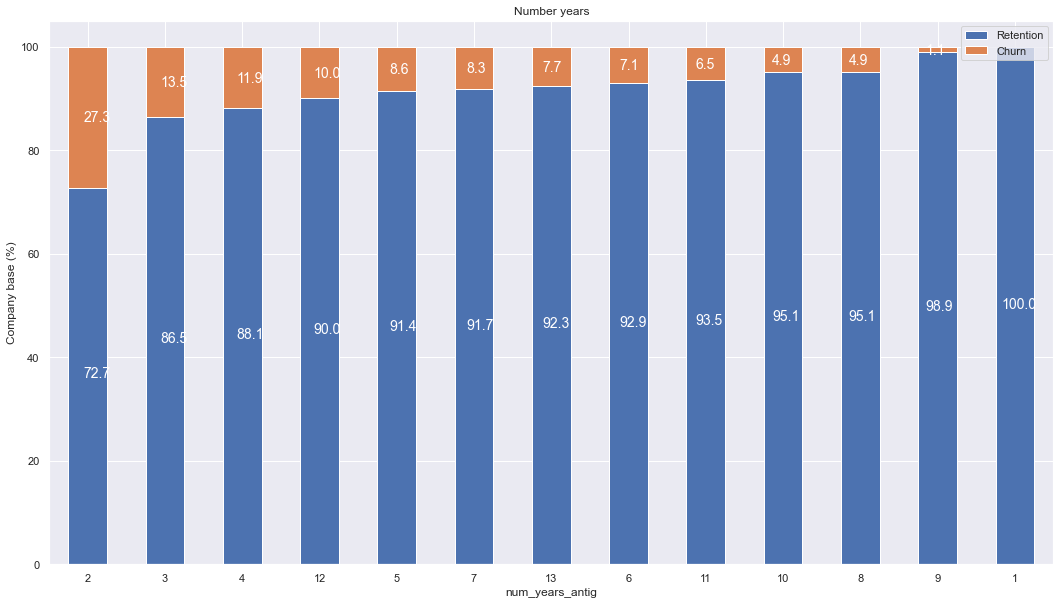

In [70]:
plot_stacked_bars(antiquity_percentage, "Number years")

In [71]:
# Group origin 
origin = others.groupby([others['origin_up'], others['churn']])['id'].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

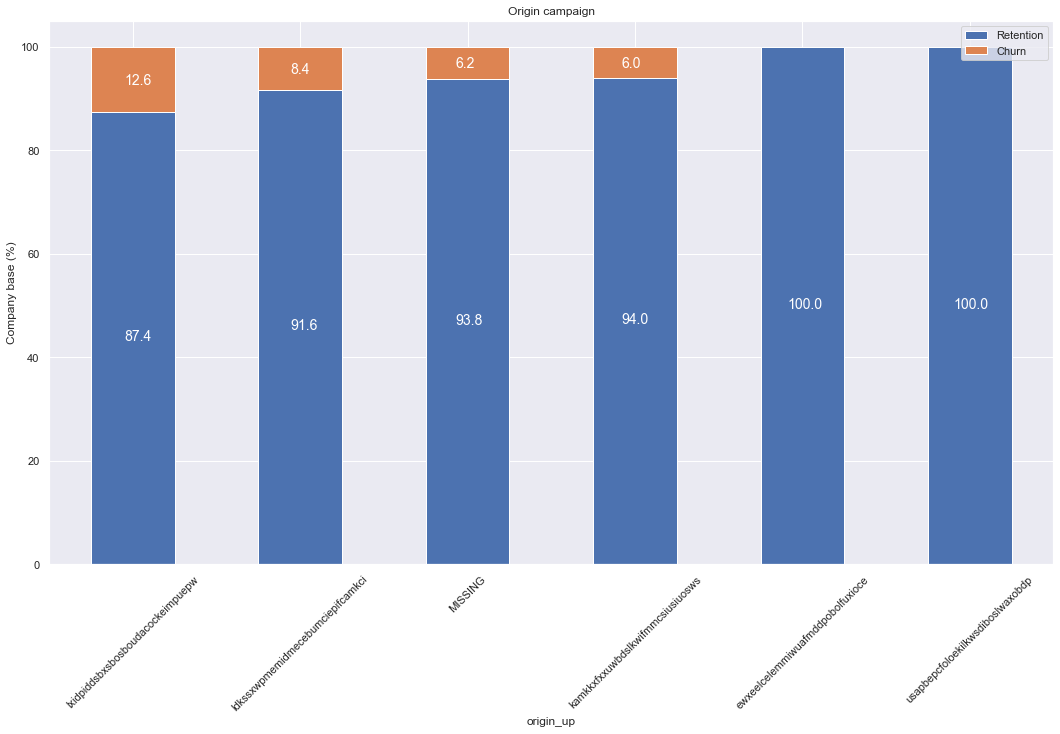

In [73]:
plot_stacked_bars(origin_percentage, "Origin campaign", rot_=45)

There are also `MISSINS` value in origin_up. We will need to talk with team for next step

## Hypothesis investigation

Let's investigate whether price sensitivity affect churn or not. First we need to define price sensitivity

In [80]:
# Create yearly sentitivity features
var_year = price_df.groupby(['id', 'price_date']).mean().groupby(['id']).var().reset_index()
# 6 months sensitivity
var_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id', 'price_date']).mean().groupby(['id']).var().reset_index()

# Rename columns
var_year = var_year.rename(
    columns={
        'price_off_peak_var': 'price_p1_var',
        'price_peak_var': 'price_p2_var',
        'price_mid_peak_var': 'price_p3_var',
        'price_off_peak_fix': 'price_p1_fix',
        'price_peak_fix': 'price_p2_fix',
        'price_mid_peak_fix': 'price_p3_fix'
    }
)

# Total price per period
var_year['price_p1'] = var_year['price_p1_var'] + var_year['price_p1_fix']
var_year['price_p2'] = var_year['price_p2_var'] + var_year['price_p2_fix']
var_year['price_p3'] = var_year['price_p3_var'] + var_year['price_p3_fix']

### 6 month
# Rename columns
var_6m = var_6m.rename(
    columns={
        'price_off_peak_var': 'price6m_p1_var',
        'price_peak_var': 'price6m_p2_var',
        'price_mid_peak_var': 'price6m_p3_var',
        'price_off_peak_fix': 'price6m_p1_fix',
        'price_peak_fix': 'price6m_p2_fix',
        'price_mid_peak_fix': 'price6m_p3_fix'
    }
)

# Total price per period
var_6m['price6m_p1'] = var_6m['price6m_p1_var'] + var_6m['price6m_p1_fix']
var_6m['price6m_p2'] = var_6m['price6m_p2_var'] + var_6m['price6m_p2_fix']
var_6m['price6m_p3'] = var_6m['price6m_p3_var'] + var_6m['price6m_p3_fix']

# Merge dataframe
price_features = pd.merge(var_year, var_6m, on='id')



In [81]:
price_features.head()

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,price_p1,price_p2,price_p3,price6m_p1_var,price6m_p2_var,price6m_p3_var,price6m_p1_fix,price6m_p2_fix,price6m_p3_fix,price6m_p1,price6m_p2,price6m_p3
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,1.871602e-06,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000e+00,7.661891e-03,0.000000,0.000000,0.007667,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000e+00,5.965909e-01,0.000000,0.000000,0.597267,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00
3,0010ee3855fdea87602a5b7aba8e42de,0.000025,0.000007,1.627620e-07,7.238536e-03,0.002606,0.001158,0.007264,0.002613,0.001158,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10
4,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000e+00,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00


We finish create new feature so now we can merge them into `cilent_df`

In [85]:
# Merge new feature into client_df
price_analysis = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_analysis.head()

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,price_p1,price_p2,price_p3,price6m_p1_var,price6m_p2_var,price6m_p3_var,price6m_p1_fix,price6m_p2_fix,price6m_p3_fix,price6m_p1,price6m_p2,price6m_p3,churn
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,0.000002,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10,0
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000,7.661891e-03,0.000000,0.000000,0.007667,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000,5.965909e-01,0.000000,0.000000,0.597267,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0
3,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0
4,0013f326a839a2f6ad87a1859952d227,0.000016,0.000004,0.000002,0.000000e+00,0.000000,0.000000,0.000016,0.000004,0.000002,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10,0


Let's see correlation using heatmap

<AxesSubplot:>

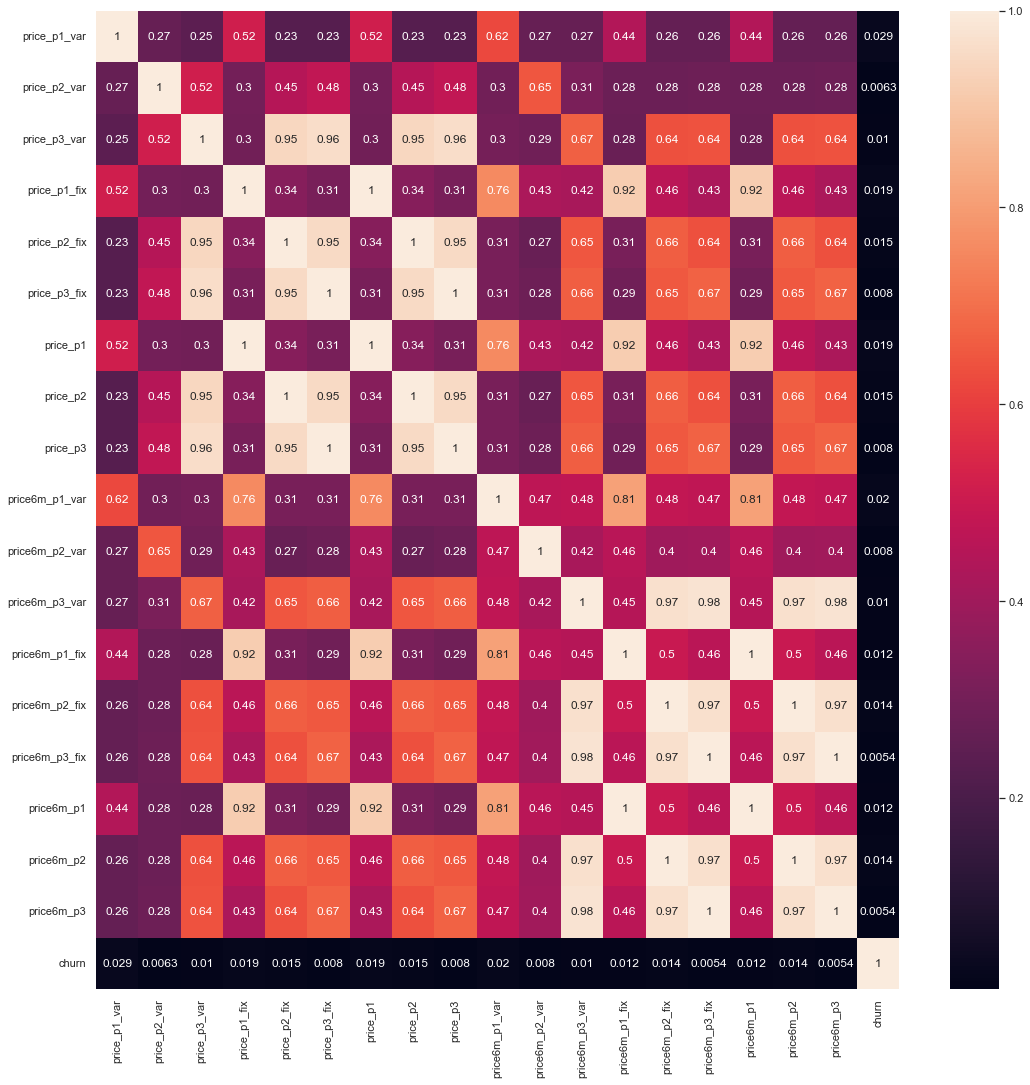

In [87]:
corr = price_analysis.corr()
# Plot
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=True)

From the correlation plot, it seem that price sensitivity have a high correlation with each other.
But have a very low correlation with churn. Which mean a weak linear relation between price and churn.In order for price sensitivity to have a major impact on predicting churn. We might need to engineer feature differently.

In [90]:
merged_data = pd.merge(client_df.drop(columns=['churn']), price_analysis , on='id')

In [91]:
merged_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price6m_p1_var,price6m_p2_var,price6m_p3_var,price6m_p1_fix,price6m_p2_fix,price6m_p3_fix,price6m_p1,price6m_p2,price6m_p3,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


In [ ]:
merged_data.to_csv('merged_data_after_eda.csv')